<a href="https://colab.research.google.com/github/daisuke-shimizu/python-Gakushuin-programming1/blob/main/Programming1_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# サンプルプログラム実行上の注意
プログラミング上達のコツは、

- 短時間に集中してできるだけ大量のプログラムを書くこと
- 試行錯誤を行うこと
- 他人の書いた（動く）プログラムを読むこと
- 更に、自分の目的に合わせてカスタマイズしてみること

を日常的に実行することです。
しかし、限られた授業時間（予習・復習も含む）内で、これらを十分に実行することは至難です。

そこで、
この講義資料は、多数のサンプルプログラムを提供して、
少しでも不足を補うことができるように作成されています。
受講者は、以下の注意を守ってサンプルプログラムをコードセル中で実行することで、
より効率の良い学習を心がけて下さい。

1. サンプルプログラムは、コピペせず、1行1行自分でタイプして書き写して下さい。
コピペでは見逃してしまう、プログラミングの書き方の規則や、プログラミングのコツなど、
自分自身でタイプすることで気づくことができます。
2. サンプルプログラムを書き写す時は、プログラムの意味を考えるよう努めて下さい。
最初は必ずしも最良とは言えないサンプルプログラムを提示して、
後で改良した例を示すなど、この講義資料では、良いプログラムを作成する考え方を効率的に学べるよう、
いろいろな工夫をしています。
3. 意味を理解できない行がある場合には、あまり拘泥せず、先に進んでください。
100%理解しないといけないという思い込みは、プログラミングの上達にとって妨げです。
理解するための努力は必要ですが、Pythonでできることの範囲は非常に広く、
プロのプログラマでも全部は理解していないでしょう。
完璧な理解よりも、**動くプログラムを書くことを最優先の目標**として、
わからない部分は「おまじない」として受け入れることができると、上達も早くなります。
「おまじない」とは、「なぜ効くのかはわからないけれども、使い方は分かっている」という意味です。

# 前回の演習問題の解答例

### 演習 6-1
区間$0 \le x \le 2\pi$において、$y = \sin x$のグラフを描画せよ。

### 解答例
解像度が不足ですので、調整して下さい。

```python
x = np.arange(0, math.pi, 1)
y = [math.sin(t) for t in x]
plt.plot(x, y)
plt.show()
```

```python
x = np.linspace(0, math.pi, 3)
y = [math.sin(t) for t in x]
plt.plot(x, y)
plt.show()
```

### 演習 6-2
区間$0 < x \le e$において、$y = \log_e x$のグラフを描画せよ。

**ヒント**
`numpy.delete(x, 0)`は、配列`x`の先頭の要素取り去った新しい配列を返す。

**ヒント**
ネイピア数$e=2.718\dots$は、`math.e`により利用することができる。

### 解答例
解像度が不足ですので、調整して下さい。

```python
import numpy as np
x = np.arange(0, math.e, 0.5)
x = np.delete(x, 0)
y = [math.log(t) for t in x]
plt.plot(x, y)
plt.show()
```

```python
x = np.linspace(0, math.e, 4)
x = np.delete(x, 0)
y = [math.log(t) for t in x]
plt.plot(x, y)
plt.show()
```
### 演習 6-3
次のプログラム行

```python
draw_graph(math.sin, 0, 2 * math.pi, 100）
```

を実行すると、
区間$0 < x < 2\pi$を100等分する解像度で、区間において$y = \sin x$のグラフを描画できるように、
関数`draw_graph(f, a, b, N)`のプログラムを作成せよ。

**ヒント** 
第5回講義「関数オブジェクト」で導入した`draw_graph_proto(f)`を参考にせよ。

```python
def draw_graph(f, a, b, N):
    x = np.linspace(a, b, N+1)
    y = [f(t) for t in x]
    plt.grid()
    plt.plot(x, y)
    plt.show()
```

幅`delta`で区間$[a, b]$を内分したい時、
`np.arrange(a, b, delta)`では、`b`が含まれません。
`range(1,10)`が、リスト`[1,2,3,4,5,6,7,8,9]`と同等であることと同じ理由です。

```python
def draw_graph(f, a, b, N):
    delta = (b-a)/N
    x = np.arange(a, b + delta, delta)
    y = [f(t) for t in x]
    plt.grid()
    plt.plot(x, y)
    plt.show()
```

[0. 1. 2. 3.]


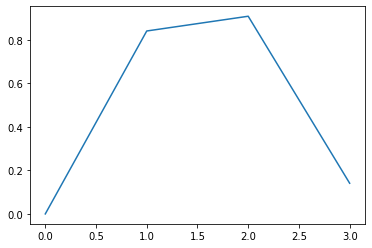

[0.         1.57079633 3.14159265]


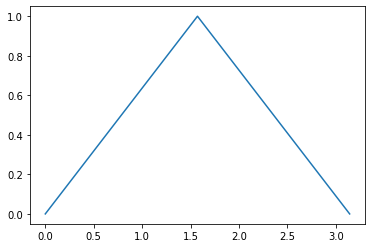

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
x = np.arange(0, math.pi, 1)
y = [math.sin(t) for t in x]
print(x)
plt.plot(x, y)
plt.show()

x = np.linspace(0, math.pi, 3)
y = [math.sin(t) for t in x]
print(x)
plt.plot(x, y)
plt.show()

# 第7回　クラス

## オブジェクト指向とクラス
数字や文字列がオブジェクトであることは既にみました。
「プログラムが計算の対象をオブジェクトとして取り扱う」という考え方を、
**オブジェクト指向**といいます。
オブジェクト指向は、現代のプログラミング言語の基本的な設計思想であり、C++やJavaなど、主要な言語はこの設計思想に基づいています。
因みに、C++は、それまで圧倒的に広く使われていたC言語にオブジェクト指向を導入したプログラミング言語であり、
JavaはCをもとにオブジェクト指向と移植性（PC、Mac、Linuxいずれの環境でも動作する）を追求して開発されたプログラミング言語です。
いずれも代表的なオブジェクト指向プログラミング言語になっています。

オブジェクト指向プログラミング言語は、オブジェクトの雛形となる新しいタイプを、
ユーザが自由に定義する機能を提供しています。
このオブジェクトの雛形（タイプ）のことを、**クラス**と呼びます。
クラスを利用することにより、
ユーザは、独自のオブジェクトの雛形を定義することが可能となり、
その雛形に基づいて、好きなだけ新しいオブジェクトを生成することが可能となります。

下のプログラムは、人オブジェクトのタイプをPersonクラスとして定義します。
人は共通に次の属性を有すると考えます。

* 姓 family_name
* 名 given_name
* 誕生月 birth_month
* 誕生日 birth_date

次のプログラムはクラスPersonを定義するものです。
```python
class Person:
  def __init__(self, fn, gn, bm, bd):
    self.family_name = fn
    self.given_name = gn
    self.birth_month = bm
    self.birth_date = bd
```

In [ ]:
class Person:
  def __init__(self, fn, gn, bm, db):
    self.family_name = fn
    self.given_name = gn
    self.birth_month = bm
    self.birth_date = db

`class Person:`の中は**おまじない**が多いので、
プログラムを読んでも何のことだかよく分からないと思います。
そこで、クラスの定義の方法は後で詳しく学ぶこととして、
その使い方から先にみてみましょう。

```python
a = Person('Smith', 'Alice', 12, 25)
```
を実行すると、姓がSmith、名がAlice、誕生日が12月25日というPersonオブジェクトを生成し、
そのオブジェクトにaという名前を割り当てます。

Personオブジェクトは、それぞれ、以下の属性を持ちます。
オブジェクトの属性のことを**インスタンス変数**ともいいます。
Personオブジェクトは、次の４つのインスタンス変数を持っています。

| インスタンス変数 | 内容 |
| :--- | :--- |
| family_name | オブジェクトの姓 |
| given_name | オブジェクトの名 |
| birth_month | オブジェクトの誕生月 |
| birth_day | 誕生月におけるオブジェクトの誕生日 |

オブジェクトの属性にアクセスするには
```
オブジェクトの名前.インスタンス変数の名前
```
と、
オブジェクトの名前とインスタンス変数の名前の間にピリオド`.`を挟むことで指定します。

以下のプログラムを実行すると、理解できるでしょう。
ちなみに、プログラムの文字列に現れる`\t`はタブを表す記号です。
タブを挿入することで、文字列の表示を揃えることができます。

```python
a = Person('Smith', 'Alice', 12, 25)
print("姓\t名\t月\t日")
print(a.family_name, '\t', a.given_name, '\t', a.birth_month, '\t', a.birth_date)
```

In [ ]:
class Person:
  def __init__(self, fn, gn, bm, db):
    self.family_name = fn
    self.given_name = gn
    self.birth_month = bm
    self.birth_date = db

a = Person('Smith', 'Alice', 12, 25)
print("姓\t名\t月\t日")
print(a.family_name, '\t', a.given_name, '\t', a.birth_month, '\t', a.birth_date)


姓	名	月	日
Smith 	 Alice 	 12 	 25


別の人物（Personオブジェクト）を生成するには、例えば、
```python
b = Person('Tailor', 'Bob', 4, 8)
```
とします。
次のプログラムを実行して確かめてください。
```python
print("姓\t 名\t 月\t 日")
print(a.family_name, a.given_name, a.birth_month, a.birth_date)
print(b.family_name, b.given_name, b.birth_month, b.birth_date)
```

In [ ]:
b = Person('Tailor', 'Bob', 4, 8)
print("姓\t 名\t 月\t 日")
print(a.family_name, '\t', a.given_name, '\t', a.birth_month, '\t', a.birth_date)
print(b.family_name, '\t', b.given_name, '\t', b.birth_month, '\t', b.birth_date)

姓	 名	 月	 日
Smith 	 Alice 	 12 	 25
Tailor 	 Bob 	 4 	 8


定義できる人物の員数に制限はありません。
また、次のように、リストを使って、一括して定義することも可能です。
この例では、定義された人物は、`persons`と名付けられたリストに登録されます。
```python
fn = ['Smith', 'Tailor', 'Cook', 'Brown', 'Drake', 'White']
gn = ['Alice', 'Bob', 'Cathy', 'Dave', 'Eve', 'Frida']
bm = [12, 4, 8, 2, 9, 11]
bd = [25, 8, 12, 1, 17, 21]
persons = [Person(fn[i], gn[i], bm[i], bd[i]) for i in range(len(fn))]
print("姓\t名\t月\t日")
for p in persons:
    print(p.family_name, '\t', p.given_name, '\t', p.birth_month, '\t', p.birth_date)
```

In [ ]:
fn = ['Smith', 'Tailor', 'Cook', 'Brown', 'Drake', 'White']
gn = ['Alice', 'Bob', 'Cathy', 'Dave', 'Eve', 'Frida']
bm = [12, 4, 8, 2, 9, 11]
bd = [25, 8, 12, 1, 17, 21]

persons = [Person(fn[i], gn[i], bm[i], bd[i]) for i in range(len(fn))]
print("姓\t名\t月\t日")
for p in persons:
  print(p.family_name, '\t', p.given_name, '\t', p.birth_month, '\t', p.birth_date)

姓	名	月	日
Smith 	 Alice 	 12 	 25
Tailor 	 Bob 	 4 	 8
Cook 	 Cathy 	 8 	 12
Brown 	 Dave 	 2 	 1
Drake 	 Eve 	 9 	 17
White 	 Frida 	 11 	 21


次に、`persons`の要素を、姓のアルファベット順に並べ替えましょう。

リストの要素の並べ替えについては、前に、`sorted`関数を学びました。
例を使って、復習しましょう。
```python
import random
a = list(range(10))
random.shuffle(a)
print(a)
```
により、0から9まで、10個の整数をシャッフル（ランダムに並べ替え）した結果であるリストを、`a`と名付けます。
`random.shuffle`関数は、引数で指定されたリストの要素をシャッフルする関数です。
ここで、
```python
print(sorted(a))
```
を実行すると、もとの通り、0から10まで昇順に要素を並べ直してくれることは既に学びました。
しかし、リスト`a`の内容は変更されません。
これは、改めて、
```python
print(a)
```
を実行すると分かります。

一方、`a`の要素を昇順に並べ直して、その結果で`a`の内容を更新するためには、`sort`関数を、
```python
a.sort()
```
の形式で利用します。
`sorted(a)`とは、関数の呼び出し方が違うことに注意してください。
前にも述べましたが、Pythonでは、関数の呼び出す時に、関数名を前置するケース（例えば、`sorted(a)`）と、
後置するケース（例えば、`a.sort()`）がありますが、
その区別が明確ではなく、Pythonの欠点の一つといえます。
例えば、
`sorted(a)`では`a`自体は変化せず、新しいリストが生成されるのに対し、
`a.sort()`では`a`が変化するので、
「関数を後置すると引数の内容を更新するのではないか？」と思う人もいるかもしれませんが、
例えば、`random.shaffle(a)`では、`a`の内容が更新されます。

`a.sort()`により`a`の要素の順序が変更されることは、以下のプログラムを実行すれば、容易に確認できます。
```python
a.sort()
print(a)
```

以上のプログラムを下のコードセルに書き写して、実行してください。

In [ ]:
import random as rnd
a = list(range(10))
rnd.shuffle(a)
print(a)
a.sort()
print(a)

[1, 8, 9, 3, 5, 0, 6, 7, 2, 4]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


`sort`関数を使って、`persons`の要素（`Person`クラスのオブジェクト）を、
`family_name`（姓）のアルファベット順に並べ替える方法をみます。

リスト`persons`の要素は、前の例のように数ではなく、Personオブジェクトであり、Personオブジェクト同士を直接比較することができません。
そのために一工夫必要です。
まず、ソートのキー（ソートの時に比較する値）である`family_name`を返す簡単な関数を用意します。
```python
def family_name(p):
    return p.family_name
```
その上で、`sort`関数のパラメータ`key`に関数`family_name`を指定して、
Personオブジェクトを`family_name`の値で比較してソートするように指示します。
```python
persons.sort(key = family_name)
```
`key = family_name`は、正確には、
`key`と名付けられた関数`sort`の省略可能な引数（パラメータ）に`family_name`を入力しています。
このように、Pythonでは、関数の引数に名前をつけて、名前と関連づけて引数の指定が可能です。
例えば、`sort()`関数には、`key`の他に、`reverse`という引数もありますが、
それについては次のセルで見ます。

正しくソートできているかは、今まで使ってきた以下のプログラムを利用すれば良いでしょう。
```python
print("姓\t名\t誕生月\t誕生日")
for p in persons:
    print(p.family_name, '\t', p.given_name, '\t', p.birth_month, '\t', p.birth_date)
```
以上のプログラムを下のセルに書き写して、`persons`が正しくソートされていることを確認してください。

In [ ]:
fn = ['Smith', 'Tailor', 'Cook', 'Brown', 'Drake', 'White']
gn = ['Alice', 'Bob', 'Cathy', 'Dave', 'Eve', 'Frida']
bm = [12, 4, 8, 2, 9, 11]
bd = [25, 8, 12, 1, 17, 21]

persons = [Person(fn[i], gn[i], bm[i], bd[i]) for i in range(len(fn))]

print("姓\t名\t誕生月\t誕生日")
for p in persons:
    print(p.family_name, '\t', p.given_name, '\t', p.birth_month, '\t', p.birth_date)

def family_name(p):
  return p.family_name

persons.sort(key = family_name)

print("姓\t名\t誕生月\t誕生日")
for p in persons:
    print(p.family_name, '\t', p.given_name, '\t', p.birth_month, '\t', p.birth_date)


[<__main__.Person object at 0x7faf30525250>, <__main__.Person object at 0x7faf30525c50>, <__main__.Person object at 0x7faf30525610>, <__main__.Person object at 0x7faf30525d10>, <__main__.Person object at 0x7faf30525650>, <__main__.Person object at 0x7faf30541990>]
姓	名	誕生月	誕生日
Smith 	 Alice 	 12 	 25
Tailor 	 Bob 	 4 	 8
Cook 	 Cathy 	 8 	 12
Brown 	 Dave 	 2 	 1
Drake 	 Eve 	 9 	 17
White 	 Frida 	 11 	 21
姓	名	誕生月	誕生日
Brown 	 Dave 	 2 	 1
Cook 	 Cathy 	 8 	 12
Drake 	 Eve 	 9 	 17
Smith 	 Alice 	 12 	 25
Tailor 	 Bob 	 4 	 8
White 	 Frida 	 11 	 21


上の例と逆順にソートするには、
```python
persons.sort(key = family_name, reverse = True)
```
と、`reverse`という名前の引数を利用します。

In [ ]:
persons.sort(key = family_name, reverse = True)
print("姓\t名\t誕生月\t誕生日")
for p in persons:
    print(p.family_name, '\t', p.given_name, '\t', p.birth_month, '\t', p.birth_date)

姓	名	誕生月	誕生日
White 	 Frida 	 11 	 21
Tailor 	 Bob 	 4 	 8
Smith 	 Alice 	 12 	 25
Drake 	 Eve 	 9 	 17
Cook 	 Cathy 	 8 	 12
Brown 	 Dave 	 2 	 1


### 演習 7-1
`persons`の要素を`given_name`のアルファベット順でソートするプログラムを作成せよ。

**ヒント** インスタンス変数`given_name`を返す関数を定義せよ。

In [ ]:
fn = ['Smith', 'Tailor', 'Cook', 'Brown', 'Drake', 'White']
gn = ['Alice', 'Bob', 'Cathy', 'Dave', 'Eve', 'Frida']
bm = [12, 4, 8, 2, 9, 11]
bd = [25, 8, 12, 1, 17, 21]

persons = [Person(fn[i], gn[i], bm[i], bd[i]) for i in range(len(fn))]

def get_given_name(p):
  return p.given_name

persons.sort(key = get_given_name)

# 呼び出し可能オブジェクトを引数に指定する場合、括弧()はいらないので注意。https://note.nkmk.me/python-key-sort-sorted-max-min/

print("姓\t名\t誕生月\t誕生日")
for p in persons:
    print(p.family_name, '\t', p.given_name, '\t', p.birth_month, '\t', p.birth_date)

姓	名	誕生月	誕生日
Smith 	 Alice 	 12 	 25
Tailor 	 Bob 	 4 	 8
Cook 	 Cathy 	 8 	 12
Brown 	 Dave 	 2 	 1
Drake 	 Eve 	 9 	 17
White 	 Frida 	 11 	 21


### 演習 7-2
`persons`の要素を`given_name`のアルファベット順の逆順（ZからAへ）でソートするプログラムを作成せよ。

In [ ]:
fn = ['Smith', 'Tailor', 'Cook', 'Brown', 'Drake', 'White']
gn = ['Alice', 'Bob', 'Cathy', 'Dave', 'Eve', 'Frida']
bm = [12, 4, 8, 2, 9, 11]
bd = [25, 8, 12, 1, 17, 21]

persons = [Person(fn[i], gn[i], bm[i], bd[i]) for i in range(len(fn))]

def get_given_name(p):
  return p.given_name

persons.sort(key = get_given_name, reverse=True)

print("姓\t名\t誕生月\t誕生日")
for p in persons:
    print(p.family_name, '\t', p.given_name, '\t', p.birth_month, '\t', p.birth_date)

姓	名	誕生月	誕生日
White 	 Frida 	 11 	 21
Drake 	 Eve 	 9 	 17
Brown 	 Dave 	 2 	 1
Cook 	 Cathy 	 8 	 12
Tailor 	 Bob 	 4 	 8
Smith 	 Alice 	 12 	 25


次は、`persons`の要素を、誕生日（月と日の組）の昇順にソートしてみます。
姓でソートする時には、`Person`オブジェクトのインスタンス変数`family_name`の値のみに注目すればよかったので、
`sort`関数の`key`に指定する関数`family_name`は、`Person`オブジェクトのインスタンス変数`family_name`を返すだけの非常に単純なものでした。

一方、誕生日の順序を決定するには、`birthday_month`と`birthday_date`の二つのインスタンス変数の値が必要です。
ここでは、誕生日が1月1日から数えて何日目かを計算する関数`birth_day_count`を以下のように作成します。
簡単のために閏年は無視し、2月は28日であるとします。

```python
month_len = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
def birth_day_count(p):
    return(sum(month_len[:p.birth_month-1]) + p.birth_date)
```

この関数の動作を、Smith Aliceを例にとって、少し詳しく見ていきましょう。
Aliceの誕生日は12月25日ですから、

$$
\text{1月から11月までの総日数} + {12月中の日数}
= (31 + 28 + 31 + 30 + 31 +30 + 31 + 31 + 30 + 31 + 30) + 6
$$

により、12月25日が1月1日から何日目であるかが計算できます。

そして、右辺の第1項は、Pythonでは`sum(month_len[:11])`で計算することができます。

* `month_len[:11]`は、`month_len`の第0項から第10項まで11個の要素のリスト、つまり、
`[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]`です。
* 関数`sum(リスト)`は、リストの要素の話を返します。
例えば、
```python
a = [1,2,3,4,5,6,7,8,9,10]
print(sum(a))
```
は、1から10までの自然数の総和55を出力します。
```python
print(sum(range(11)))
```
も同じ結果を返します。

これを一般化すれば、Personオブジェクト`p`に対し、

```python
sum(month_len[:p.birth_month-1]) + p.birth_date
```

により、1月1日から数えた誕生日の日数が計算できることが分かります。

```python
print([birth_day_count(p) for p in persons])
```

を実行して、計算が正しいことを確かめてください。

さて、
```python
p = Person("Jane", "Doe", 1, 1)
birth_day_count(p)
```
により新しいPersonオブジェクトを定めて、
```python
print(pbirth_day_count(p))
```
を実行してみましょう。
正しく1が出力されたと思いますが、
これはそれほど当たり前ではありません。
`p.birth_month`の値は1ですので、
`month_len[:0]`は空のリストになります。
空のリストに対して`sum()`が正しく0とならなければ、
関数`birth_day_count`は正しく動かないからです。
以下のプログラムを実行してください。
```python
print(month_len[:0])
print(sum(month_len[:0]))
```
`sum(month_len[:0])`の値は、**正しく**０になっている筈です。

In [ ]:
fn = ['Smith', 'Tailor', 'Cook', 'Brown', 'Drake', 'White', 'Shimizu']
gn = ['Alice', 'Bob', 'Cathy', 'Dave', 'Eve', 'Frida', 'Daisuke']
bm = [12, 4, 8, 2, 9, 11, 1]
bd = [25, 8, 12, 1, 17, 21, 1]

persons = [Person(fn[i], gn[i], bm[i], bd[i]) for i in range(len(fn))]

month_len = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
def birth_day_count(p):
  return(sum(month_len[:p.birth_month-1]) + p.birth_date)

print([birth_day_count(p) for p in persons])

print(month_len[:0])
print(sum(month_len[:0]))
print(sum([]))

[359, 98, 224, 32, 260, 325, 1]
[]
0
0


### 演習 7-3
`birth_day_cout`関数を利用して、`persons`の要素を誕生日（月と日の組）で昇順にソートするプログラムを作成せよ。

In [ ]:
fn = ['Smith', 'Tailor', 'Cook', 'Brown', 'Drake', 'White']
gn = ['Alice', 'Bob', 'Cathy', 'Dave', 'Eve', 'Frida']
bm = [12, 4, 8, 2, 9, 11]
bd = [25, 8, 12, 1, 17, 21]

persons = [Person(fn[i], gn[i], bm[i], bd[i]) for i in range(len(fn))]

persons.sort(key = birth_day_count)

print("姓\t名\t誕生月\t誕生日")
for p in persons:
    print(p.family_name, '\t', p.given_name, '\t', p.birth_month, '\t', p.birth_date)

姓	名	誕生月	誕生日
Brown 	 Dave 	 2 	 1
Tailor 	 Bob 	 4 	 8
Cook 	 Cathy 	 8 	 12
Drake 	 Eve 	 9 	 17
White 	 Frida 	 11 	 21
Smith 	 Alice 	 12 	 25


これまで、クラスを利用する方法を見てきましたが、ここからはクラスの定義方法について学びましょう。

例えば、
```python
a = Person('Smith', 'Alice', 12, 25)
```
で、`Person`という名前の関数を呼んで、
Alice Smithという名前をもち、12月25日が誕生日の人物（Personオブジェクト）を生成しました。

この関数`Person`を、**コンストラクタ**とか**初期化関数**と呼びますが、
クラス定義の中では、`__init__`関数として定義されます。
`Person`クラスでは、
```python
   def __init__(self, fn, gn, bm, bd):
    self.family_name = fn
    self.given_name = gn
    self.birth_month = bm
    self.birth_date = bd
```
と定義されています。
`__init__`関数は、
クラスのオブジェクトが生成される時に必ず実行されます。

プログラムの内容をみてみましょう。
```python
def __init__(self, fn, gn, bm, bd):
```
は引数を5つ持ちますが、最初の`self`は**おまじない**だと思っていて下さい。

| 引数 | 内容 |
| :--- | :--- |
| self | オブジェクト自分自身を指す |
| fn | family_name = 姓を指定する引数 |
| gn | given_name = 名を指定する引数 |
| bm | birthday_month = 誕生月を指定する引数 |
| bd | birthday_date = 誕生日を指定する引数 |

`__init__`関数以外にも、クラス定義の中で、関数を定義することがありますが、1番目の引数は必ず`self`になります。
しかし、関数を呼び出す時には、この引数は明示的に指定しません。
例えば、
```python
a = Person("Smith", "Alice", 12, 25)
```
により、`"Smith"`が引数`fn`、`"Alice"`が引数`gn`、`12`が引数`bm`、25が引数`bd`として、`__init__`関数に引き渡されますが、
引数`self`には値が指定されません。

`__init__`関数の機能は、`def __init__(self, fn, gn)`に続く、インデントされた4行のプログラムが定義します。
```python
    self.family_name = fn
    self.given_name = gn
    self.birth_month = bm
    self.birth_date = bd
```
は、インスタンス変数`family_name`、`given_name`、`burth_month`、及び、`birth_date`に、
`__init__`関数の引数`fn`、`gn`、`bm`、及び、`bd`として渡された値を割り当てます。
`self.family_name`と、`self.`が先頭についていますが、
これは`family_name`がインスタンス変数であることを示しています。


次回以降では、誕生日が一致するペアが存在する確率に関する誕生日パラドックスのシミュレーションを行います。
このシミュレーションでは、誕生日をランダムに定めた多くのPersonオブジェクトを利用します。

以下では、任意の員数の人物を、姓名と誕生日がランダムに決定されるようなプログラムを作成して、シミュレーションの準備とします。

閏年は考えないことにして、1年を365日とします。
誕生日を一様ランダムに選ぶためには、1から365までの間の整数をランダムに選び、次に、それを月と日のペアで表します。
そのために、1から365までの整数を月日に変換する関数`month_date()`を、次のようにプログラムします。
```python
month_len = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
def month_date(x):
    m = 0
    while x > 0:
        x -= month_len[m]
        m += 1
    return (m, x + month_len[m-1])
```

このプログラムは、新しい要素を二つ含んでいます。

* `while 論理式:`は、論理式が真（`True`）である間、スコープに定義されたプログラムを繰り返し実行します。
このような繰り返し計算を、**whileループ**と呼びます。
* `tpl = (a, b)`は**タプル**と呼ばれるオブジェクトのタイプで、二つの要素のペアです。
1番目の要素は`tpl[0]`で、2番目の要素は`tpl[1]`でアクセスできます。


## Whileループ

`month_date`関数のアルゴリズムの説明を通して、`while`ループについて説明します。
分かりやすいように、具体的な例を用います。

1. $x$をある誕生日の1月1日からの日数として、1から365までの間の整数、仮に、$x = 67$とします。
2. $m$は月を表す整数オブジェクトで、初期値として、$m = 0$とします。
3. `while x > 0:`の論理式`x > 0`は真`True`なので、`while`ループの中の2行
```python
        x -= month_len[m]
        m += 1
```
が実行され、`x`と`m`の値は次のように更新されます。
$$
    x = 67 - 31 = 36,\quad m = 0 + 1 = 1
$$
31は、`month_len[0]`の値で、1月の日数です。
4. もし、更新した$x$が
$$
x \le 0
$$
であれば、$x$は1月中の日になります。
この場合では、更新後の$x$の値は、
$$
x = 67 - 31 = 36 > 0
$$
で正になりますので、67は1月中の日ではありません。
1. `m += 1`により、`m`の値は1足されているので、`m`の値は1になっています。
1. `while x > 0:`の論理式`x > 0`は真`True`なので、
`while`ループの中の2行
```python
        x -= month_len[m]
        m += 1
```
が実行されます。
つまり、`x`と`m`の値は、
$$
x = 36 - 28 = 8, \quad m = 1 + 1 = 2
$$
と更新されます。
ここで、
$$
x \le 0
$$
がなりたてば、67は2月中の日であるという結論になりますが、
$$
x = 36 - 28 = 8 > 0
$$
なので、この結論は成り立ちません。
1. つまり、`while x > 0:`の論理式`x > 0`は真`True`なので、
`while`ループの中の2行
```python
        x -= month_len[m]
        m += 1
```
が実行されます。
$$
x = 8 - 31 = -23, \quad m = 2 + 1 = 3
$$
と更新しますが、今度は、
$$
x = 8 - 31 = -23 < 0
$$
が成り立つので、67は3月中の日であることが分かります。
この時、$m = 3$が成り立っていて、誕生日の月を表しています。
1. 今度は、`while x > 0:`の論理式`x > 0`は偽`False`なので、
`while`ループから抜け出して、
```python
    return (m, x + month_len[m-1])
```
を実行します。
$x = - 23$は、月の日数を引き過ぎた結果として、負の値になっていますので、
これを戻します。
最後に引いた値は`month_len[m-1]`（`month_len[2]`、つまり、3月の日数）でしたので、
67日の3月中の日付けは`x + month_len[m-1]`で計算されます。
実際、`month_len[m-1]`の値は31なので、
$$
x = -23 + 31 = 8
$$
が求める日付になります。
1. 関数`month_date(67)`は、タプル`(3,8)`を返すことが分かります。

つまり、$x$から月と日を計算するアルゴリズムは、以下のように整理することができます。

1. $m = 0$を初期値とする。
1. $x > 0$が成り立つ限り、次の計算を繰り返す。
$$
x = x - (\text{$(m+1)$月の日数}), \quad m = m + 1
$$
1. 求める月は$m$、日付は$x + (\text{$m$月の日数})$である。

以下のプログラムは、このアルゴリズムを忠実に表現しています。

```python
    m = 0
    while x > 0:
        x -= month_len[m]
        m += 1
    return (m, x + month_len[m-1])
```
### 演習 7-4
`month_date`関数のプログラムが正しいことを、複数の例を使って、検証せよ。

In [7]:
month_len = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
def month_date(x):
    m = 0
    while x > 0:
        x -= month_len[m]
        m += 1
    return (m, x + month_len[m-1])


newyearday = month_date(1)
my_birthday = month_date(244)
lastyearday = month_date(365)

print(newyearday)
print(my_birthday)
print(lastyearday)

(1, 1)
(9, 1)
(12, 31)


`month_date`関数を使うと、以下のプログラムにより、誕生日（月と日のペア）をランダムに生成することができます。
```python
x = random.choice(range(1, 365))
print(month_date(x))
```

次に、姓名をランダムに生成するプログラムを作成します。
勝手に、姓や名前を生成するわけにも行かないので、予め、候補を定めておきます。
```python
fn_pool = ['Smith', 'Johnson', 'Williams', 'Jones', 'Brown', 'Davis', 'Miller', 'Wilson', 'Moore', 'Taylor', 'Anderson', 'Thomas', 'Jackson', 'White', 'Harris', 'Martin', 'Thompson', 'Garcia', 'Martinez', 'Robiinson']
gn_pool = ['Noah', 'Liam', 'Elijah', 'Oliver', 'James', 'Mason', 'Logan', 'Lucas', 'Mateo', 'Ethan', 'Olivia', 'Emma', 'Ava', 'Isabella', 'Mia', 'Sophia', 'Amelia', 'Charlotte', 'Luna', 'Harper']
```
`fn_pool`と`gn_pool`は、それぞれ、米国でもっとも人口の多い20の姓と、人気の高い20の名前をリストにしたものです。
```python
fn = random.choice(fn_pool)
gn = random.choice(gn_pool)
```
により、ランダムに姓名を決定することができます。

以上のプログラムを以下のように組み合わせて、次のようにランダムにPersonオブジェクトを生成することができます。
```python
m, d = month_date(random.choice(range(1, 365)))
fn = random.choice(fn_pool)
gn = random.choice(gn_pool)
p = Person(fn, gn, m, d)
print(p.family_name, p.given_name, p.birth_month, p.birth_date)
```
このプログラムを実行して見ましょう。

In [ ]:
import random as rnd
fn_pool = ['Smith', 'Johnson', 'Williams', 'Jones', 'Brown', 'Davis', 'Miller', 'Wilson', 'Moore', 'Taylor', 'Anderson', 'Thomas', 'Jackson', 'White', 'Harris', 'Martin', 'Thompson', 'Garcia', 'Martinez', 'Robiinson']
gn_pool = ['Noah', 'Liam', 'Elijah', 'Oliver', 'James', 'Mason', 'Logan', 'Lucas', 'Mateo', 'Ethan', 'Olivia', 'Emma', 'Ava', 'Isabella', 'Mia', 'Sophia', 'Amelia', 'Charlotte', 'Luna', 'Harper']

fn = rnd.choice(fn_pool)
gn = rnd.choice(gn_pool)

m, d = month_date(rnd.choice(range(1, 365)))
fn = rnd.choice(fn_pool)
gn = rnd.choice(gn_pool)
p = Person(fn, gn, m, d)
print(p.family_name, p.given_name, p.birth_month, p.birth_date)

Martin Mason 7 7


### 演習 7-5
直前のセルのプログラムを参考にして、ランダムな姓名と誕生日をもつ
100名のPersonオブジェクトを生成し、その誕生月の分布を棒グラフで表せ。

#### ヒント
グラフ描画の部分は以下の棒グラフを描画するプログラムを参考にせよ。
```python
import matplotlib.pyplot as plt
count = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.bar(range(12), count)
plt.show()
```
#### ヒント
誕生月の人数は、１２個の数を要素として持つ`count`に格納するが、最初に
```python
count = [0,0,0,0,0,0,0,0,0,0,0,0]
```
或いは
```python
count = [0 for n in range(12)]
```
或いは
```python
count = [0]*12
```
で初期化する。
`count = [0]*12`は、初出の書き方だが、覚えておくと便利である。

#### ヒント
誕生月のカウントには`for`ループを使う。
例えば、8月を誕生月とする人数は、`count[8-1]`でアクセスできる。
8から1を引くのは、リストの要素の順番は０から始まるからである。
８月のカウントを１増やすには、
```
count[8-1] += 1
```
とすれば良い。

#### ヒント
この演習に解答するために必要な知識は全て学習済みであるので、
必要に応じて過去の資料を復習せよ。


In [ ]:
count = [0]*12
print(count)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


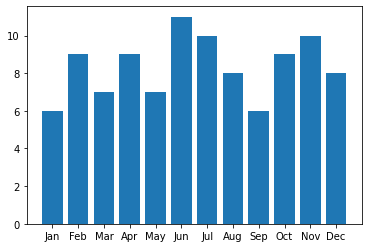

In [ ]:
# 演習 7-5の解答

import random as rnd
import matplotlib.pyplot as plt

fn_pool = ['Smith', 'Johnson', 'Williams', 'Jones', 'Brown', 'Davis', 'Miller', 'Wilson', 'Moore', 'Taylor', 'Anderson', 'Thomas', 'Jackson', 'White', 'Harris', 'Martin', 'Thompson', 'Garcia', 'Martinez', 'Robiinson']
gn_pool = ['Noah', 'Liam', 'Elijah', 'Oliver', 'James', 'Mason', 'Logan', 'Lucas', 'Mateo', 'Ethan', 'Olivia', 'Emma', 'Ava', 'Isabella', 'Mia', 'Sophia', 'Amelia', 'Charlotte', 'Luna', 'Harper']

persons_list = []
for i in range(100):
  m, d = month_date(rnd.choice(range(1, 365)))
  fn = rnd.choice(fn_pool)
  gn = rnd.choice(gn_pool)
  persons_list.append(Person(fn, gn, m, d))


count = [0]*12
for p in persons_list:
  count[p.birth_month -1] += 1


plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.bar(range(12), count)
plt.show()


## メソッド（関数）の定義
オブジェクトに適用する関数を、クラス定義の中に記述することができます。
例を通して学んでいきます。

次のセルのプログラムで、Personオブジェクトの属性を出力することができます。
```python
p = Person('Smith', 'Alice', 12 ,25)
print("姓=", p.family_name, "\t名=", p.given_name, "\t誕生日=", p.birth_month, "月", p.birth_date,"日")
```

In [ ]:
p = Person('Smith', 'Alice', 12, 25)
print("姓=", p.family_name, "\t名=", p.given_name, "\t誕生日=", p.birth_month, "月", p.birth_date,"日")

姓= Smith 	名= Alice 	誕生日= 12 月 25 日


`Person`オブジェクトの属性を表示する機会は多くあるでしょう。
その度に、長いプログラム行を書くのは面倒ですが、
`Person`のクラス定義の中に、以下のように、 関数`show`を定義することで、この面倒を回避することができます。
```python
class Person:
    def __init__(self, fn, gn, bm, bd):
        self.family_name = fn
        self.given_name = gn
        self.birth_month = bm
        self.birth_date = bd
    def show(self):
        print("姓=", self.family_name, "\t名=", self.given_name, "\t誕生日=", self.birth_month, "月", self.birth_date,"日")
```
前のセルと同様に`Person`オブジェクトの属性を表示するには、次のプログラムを実行すれば
```python
p.show()
```
クラス定義の中に関数を記述するときは、おまじないの引数`self`を指定する必要がある点を除いては、
通常の関数の定義と同じです。
この関数を使う時には、次の点に気をつけましょう。

* `オブジェクトの名前.関数名(引数)`と、関数名を後置します。
* 関数が引数を取らない場合でも、`オブジェクトの名前.関数名()`と空の括弧をつけて、オブジェクトの属性と区別します。

### 演習 7-6
血液型（A, B, O, AB）をインスタンス変数`blood_type`に保持するように、クラス`Person`の定義を変更せよ。
`__init__`関数、`show`関数も変更すること。


In [ ]:
# 演習 7-6の解答
class Person:
  def __init__(self, fn, gn, bm, bd, bt):
    self.family_name = fn
    self.given_name = gn
    self.birth_month = bm
    self.birth_date = bd
    self.blood_type = bt
  def show(self):
    print("姓=", self.family_name, "\t名=", self.given_name, "\t誕生日=", self.birth_month, "月", self.birth_date,"日", "\t血液型は", self.blood_type, "です")

p = Person('Shimizu', 'Daisuke', 9, 1, 'O')
p.show()

姓= Shimizu 	名= Daisuke 	誕生日= 9 月 1 日 	血液型= O です


次の演習は時間をかけてじっくり取り組んでください。
今までに学習した知識だけでプログラムを作成することができます。
サンプルプログラムを再利用するのは、一向に構いません。
むしろ、積極的に、再利用してください。
既存のプログラムの再利用はプログラミングの実力向上の近道です。
サンプルプログラムを再利用して、この演習に自力で解答できたら、
プログラミング上達の最初のハードルを超えることができた証拠になります。

### 演習 7-7
これまでに作成したプログラムでは閏年が考慮されておらず、2月29日生まれのPersonオブジェクトは生成されない。
4分の1の確率で閏年であるものとし、
姓名・誕生日・血液型をもつ`Person`オブジェクトをランダムに100個生成するプログラムを作成せよ。


In [28]:
# 演習 7-7の解答
import random as rnd

fn_pool = ['Smith', 'Johnson', 'Williams', 'Jones', 'Brown', 'Davis', 'Miller', 'Wilson', 'Moore', 'Taylor', 'Anderson', 'Thomas', 'Jackson', 'White', 'Harris', 'Martin', 'Thompson', 'Garcia', 'Martinez', 'Robiinson']
gn_pool = ['Noah', 'Liam', 'Elijah', 'Oliver', 'James', 'Mason', 'Logan', 'Lucas', 'Mateo', 'Ethan', 'Olivia', 'Emma', 'Ava', 'Isabella', 'Mia', 'Sophia', 'Amelia', 'Charlotte', 'Luna', 'Harper']

class Person:
  def __init__(self, fn, gn, by, bm, bd, bt):
    self.family_name = fn
    self.given_name = gn
    self.birth_year = by
    self.birth_month = bm
    self.birth_date = bd
    self.blood_type = bt
  def show(self):
    print("姓=", self.family_name, "\t名=", self.given_name, "\t誕生日=", self.birth_year, "年", self.birth_month, "月", self.birth_date,"日", "\t血液型は", self.blood_type, "です")


persons_list = []
month_list = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
for i in range(100):
  by = rnd.choice(range(1900,2021))
  month_list[1] = 29 if ((by%4 == 0 and by%100 != 0) or by%400 == 0) else 28
  bm = rnd.choice(list(range(1,13)))
  last_day_of_month = month_list[m-1]
  bd = rnd.choice(list(range(1,last_day_of_month+1)))
  fn = rnd.choice(fn_pool)
  gn = rnd.choice(gn_pool)
  bt = rnd.choice(['A', 'B', 'O', 'AB'])
  persons_list.append(Person(fn, gn, by, bm, bd, bt))

for p in persons_list:
  p.show()


姓= Davis 	名= Luna 	誕生日= 1933 年 6 月 12 日 	血液型= AB です
姓= Martin 	名= Charlotte 	誕生日= 1980 年 8 月 27 日 	血液型= B です
姓= Martin 	名= Olivia 	誕生日= 2018 年 4 月 17 日 	血液型= AB です
姓= Taylor 	名= Logan 	誕生日= 1969 年 8 月 18 日 	血液型= A です
姓= Harris 	名= Ethan 	誕生日= 2008 年 4 月 26 日 	血液型= B です
姓= Anderson 	名= Logan 	誕生日= 1938 年 9 月 10 日 	血液型= A です
姓= Garcia 	名= Emma 	誕生日= 1929 年 10 月 3 日 	血液型= O です
姓= Wilson 	名= Luna 	誕生日= 1973 年 3 月 23 日 	血液型= B です
姓= Williams 	名= Oliver 	誕生日= 2001 年 12 月 15 日 	血液型= O です
姓= Martin 	名= Olivia 	誕生日= 1947 年 3 月 20 日 	血液型= AB です
姓= Wilson 	名= Harper 	誕生日= 2009 年 9 月 8 日 	血液型= AB です
姓= Davis 	名= Ethan 	誕生日= 1905 年 4 月 2 日 	血液型= B です
姓= Wilson 	名= Mason 	誕生日= 1982 年 3 月 8 日 	血液型= A です
姓= White 	名= Mateo 	誕生日= 2012 年 6 月 26 日 	血液型= O です
姓= Moore 	名= Amelia 	誕生日= 1901 年 4 月 11 日 	血液型= AB です
姓= Martin 	名= Harper 	誕生日= 1907 年 3 月 24 日 	血液型= B です
姓= Taylor 	名= Ava 	誕生日= 1947 年 10 月 20 日 	血液型= O です
姓= Robiinson 	名= Liam 	誕生日= 1956 年 10 月 24 日 	血液型= O です
姓= Wilson 	名= Ethan 	誕生日= 1951 年 7

In [27]:
month_list = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
for i in range(100):
  by = rnd.choice(range(1900,2021))
  month_list[1] = 29 if ((by%4 == 0 and by%100 != 0) or by%400 == 0) else 28
  print(by)
  print(month_list)


1912
[31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2018
[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
1944
[31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
1989
[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
1907
[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
1981
[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
1959
[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
1916
[31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
1978
[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2004
[31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
1932
[31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
1902
[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
1945
[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
1938
[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
1901
[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
1957
[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
1949
[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
1997
[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
1960
[31, 29, 31, 30, 31, 30